# Machine learning german bank's credit scoring
In this project, I will build a <b>machine learning model to predict the default probability of German Bank's customers and assign them credit scores.</b> It involves <b>supervised learning</b>, using a labeled training set, for <b>classification.</b> The <b>target</b> variable is set to <b>1</b> if the customer represents a <b>bad risk (interpreted as default)</b>, and <b>0</b> if the customer represents a <b>good risk (interpreted as not default).</b>

I will use the following <b>pipeline:</b>

<b>1. Define the business problem.</b><br>
<b>2. Collect the data and get a general overview of it.</b><br>
<b>3. Split the data into train and test sets.</b><br>
<b>4. Explore the data (exploratory data analysis)</b><br>
<b>5. Data cleaning and preprocessing.</b><br>
<b>6. Model training, comparison, selection and tuning.</b><br>
<b>7. Final production model testing and evaluation.</b><br>
<b>8. Conclude and interpret the model results.</b><br>
<b>9. Deploy.</b><br>


In <b>this notebook<b>, I will perform <b>exploratory data analysis (EDA), covering steps 1 to 4</b> of the machine learning project pipeline mentioned above. The primary <b>goal</b> here is to <b>identify the factors associated with credit risk in the form of business insights.</b> Furthermore, I will approach these steps in more detail below, providing an overview of each step and explaining the rationale behind each decision.

# 1. Business problem

<b>Context:</b>

<b>Banks</b> generate <b>profit in the credit context by lending money to borrowers and charging interest on the loans.</b> The <b>Return on Equity (ROE)</b> is a key metric that measures the bank's <b>profitability</b> by comparing its net income to the shareholders' equity. Higher ROE indicates more efficient profit generation.

ROE = (Net Income / Shareholders' Equity) * 100

<b>Credit risk</b> refers to the potential of <b>borrowers defaulting</b> on their loan payments, which can lead to <b>financial losses</b> for banks. Banks aim to <b>control credit risk</b> because it safeguards their <b>financial stability</b> and reputation. Managing credit risk involves assessing the <b>likelihood of default</b> and implementing <b>strategies to minimize losses.</b>

Banks use <b>predictive models to estimate the probability of a customer defaulting on a loan.</b> These models analyze various factors like credit history, income, and economic indicators. <b>Credit scores are then assigned to customers</b>, helping banks make <b>informed lending decisions.</b> This approach <b>enhances risk management</b> and improves the overall quality of the loan portfolio.

In summary, the <b>credit cycle</b> involves three primary phases: <b>origination</b>, where loans are granted to borrowers; <b>monitoring</b>, where borrowers' financial health is tracked to prevent defaults; and <b>collection</b>, which involves recouping funds from delinquent borrowers or defaulted loans. The focus here is to prevent default, protecting the bank from these delinquent borrowers.

<b>Problem statement:</b> The German Bank aims to predict the probability of its customers defaulting on a loan and assign credit scores to them. It is facing issues in its operations due to a significant portion of bad risk clients.

Considering this, the <b>project objectives</b> are:

<b>1. Identify the factors associated with credit risk in the form of business insights.</b><br>
<b>2. Offer suggestions for the bank to minimize credit risk in its operations.</b><br>
<b>3. Construct a model capable of accurately predicting the probability of a customer defaulting on a loan, assigning a credit score to him. In order to achieve this, ROC-AUC will be the metric of interest.</b><br>

By doing this, we generate numerous <b>benefits</b> for the german bank, such as: Improved risk management, reduced financial losses, informed lending decisions, enhanced portfolio quality, better regulatory compliance, increased profitability, and greater customer satisfaction.

And as a result, the mentioned <b>business problem is resolved.</b>


### Importing the libraries

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data and clustering.
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Utils
from notebooks.eda_utils import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Seaborn grid style.
sns.set_theme(style='whitegrid')

# 2. Understanding the data
- The dataset was collected from kaggle: https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk
- The dataset makes part of the UCI Machine Learning repository.

In [2]:
df = pd.read_csv('data/german_credit_data.csv')
# Dropping useless column.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Data dictionary
<b>1. Age</b> (numeric)<br>
<b>2. Sex</b> (text: male, female)<br>
<b>3. Job</b> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>4. Housing</b> (text: own, rent, or free)<br>
<b>5. Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>6. Checking account</b> (numeric, in DM - Deutsch Mark)<br>
<b>7. Credit amount</b> (numeric, in DM)<br>
<b>8. Duration</b> (numeric, in month)<br>
<b>9. Purpose</b> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)<br>
<b>10. Risk</b> (text: target, good risk and bad risk)<br>

Looking at dataset general information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 1000 rows and 10 columns.


There are some missing values in Checking account and Saving accounts. Furthermore, the features seem to be in the correct data types.

Looking at some descriptive statistics.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


Some interesting points:
1. The average age is approximately 36 years.
2. The average credit amount is approximately 3271. 
3. The average credit service duration is 21 months.
4. Looks like there are some outliers.

Looking at missing and duplicated values.

In [7]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

There are some missing values in Checking account and Saving accounts. Moreover, there are not duplicated values.

I will rename the columns in order to turn data manipulation easier. The target will be renamed as 'default' for interpretation purposes.

In [9]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.rename(columns={'risk': 'default'}, inplace=True)

Target (default) and sex can be expressed as binary features. I will label bad risk as 1 and good risk as 0 because the main focus will be in accurately predicting potential defaulters. Moreover, I will label male as 1 and female as 0.

In [10]:
df['default'] = df['default'].map({'bad': 1, 'good': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# 3. Split the data into train and test sets
- First of all, I will split the data into train and test sets.
- Test set is supposed to be data the model has never seen before.
- I will perform EDA focusing on the training set in order to avoid data leakage, get a realistic representation and evaluate the model correctly with new unseen data.
- I will specify stratify=y so that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets, which is the case, as there are more defaulters than non-defaulters.

In [11]:
X = df.drop(columns=['default'])
y = df['default'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (800, 9).
Train target dataset shape: (800,).
Test predictor dataset shape: (200, 9).
Test target dataset shape: (200,).


In [13]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
default
0    0.7
1    0.3
Name: proportion, dtype: float64

Test target proportion: 
default
0    0.7
1    0.3
Name: proportion, dtype: float64


The target classes proportions were preserved.

# 4. Exploratory data analysis
I will explore the training set in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights from the data, especially regard to the target variable (default). Thus, I will do univariate, bivariate and multivariate analysis of the data.

I will get an entire train set (with predictor and target features) in order to use seaborn 'hue' parameter for visualizations and look at the correlation matrix.

In [14]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
828,47,1,2,free,NaN,little,8335,36,car,1
997,38,1,2,own,little,NaN,804,12,radio/TV,0
148,28,1,2,own,little,little,5371,36,furniture/equipment,0
735,29,0,0,own,NaN,moderate,3990,36,domestic appliances,0
130,24,0,2,own,NaN,moderate,8487,48,car,0


I will get categorical features, numerical features and target feature separate lists in order to turn data visualization and exploration easier.

In [15]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'default'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 5 numerical features. They are: 
['age', 'sex', 'job', 'credit_amount', 'duration']

There are 4 categorical features. They are: 
['housing', 'saving_accounts', 'checking_account', 'purpose']

The target feature is: default.


I will look at categorical features unique values. Cardinality is an important factor when choosing an encoding technique for them.

In [16]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

housing
----------------------------------------
There are 3 unique values. They are: 
housing
own     0.7125
rent    0.1800
free    0.1075
Name: proportion, dtype: float64

saving_accounts
----------------------------------------
There are 4 unique values. They are: 
saving_accounts
little        0.724085
moderate      0.137195
quite rich    0.076220
rich          0.062500
Name: proportion, dtype: float64

checking_account
----------------------------------------
There are 3 unique values. They are: 
checking_account
little      0.452479
moderate    0.442149
rich        0.105372
Name: proportion, dtype: float64

purpose
----------------------------------------
There are 8 unique values. They are: 
purpose
car                    0.34750
radio/TV               0.26875
furniture/equipment    0.18625
business               0.09875
education              0.05625
repairs                0.02250
domestic appliances    0.01250
vacation/others        0.00750
Name: proportion, dtype: float64



Insights:
1. Saving accounts and checking accounts present an ordinal relationship.
2. Purpose has a higher cardinality comparing to the other categorical features.
3. Housing doesn't have an ordinal relationship. 
4. Although there are ordinal relationships in the categorical features, once the cardinality is low, one-hot encoding might be good because it will preserve their information. Some say target encoding is prone to leakage and overfitting. Anyway, I will test both approaches and choose the best one.

Moreover, I will do univariate, bivariate and multivariate analysis of these features below in order to uncover patterns and insights.

### Univariate analysis
I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

### Target distribution

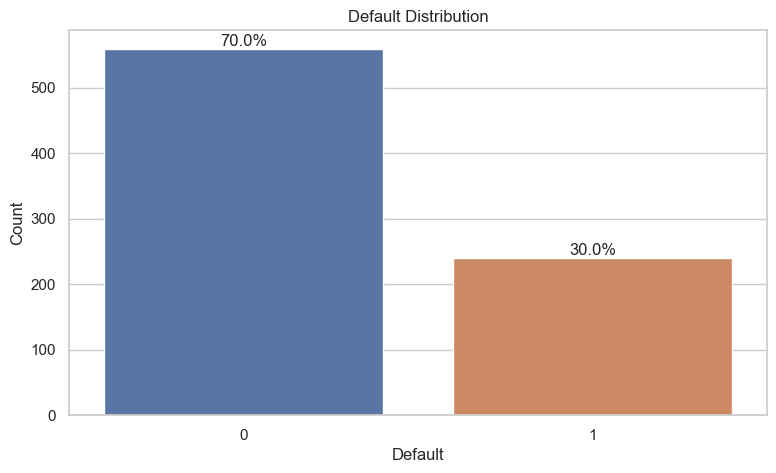

In [52]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=train, x='default')

ax.set_xlabel('Default')
ax.set_ylabel('Count')
ax.set_title('Default Distribution')

total = len(train)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2 
    y = count.get_height()
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom')
plt.show()

The target is slightly imbalanced. 30% of the customers are defaulters. Thus, I will adopt some strategies in order to deal with this, because I only have 1000 rows of data. They are:
1. Stratified hold-out and k-fold cross validation in order to maintain the target proportion on test and validation sets, even for hyperparameter tuning.
2. Define different class weights for majority and minority class instances. The idea is to define higher weights to minority class, such that the model will be penalized when mistakenly classifying a defaulter. These weights are defined on the model specific hyperparameter for it.
3. Focus on the ROC-AUC metric. ROC AUC curve and its associated AUC value help assess how well a credit scoring model differentiates between customers who will default on loans (positive class) and those who will not (negative class). 

### Numerical features distributions
I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the bank's customers numeric attributes.

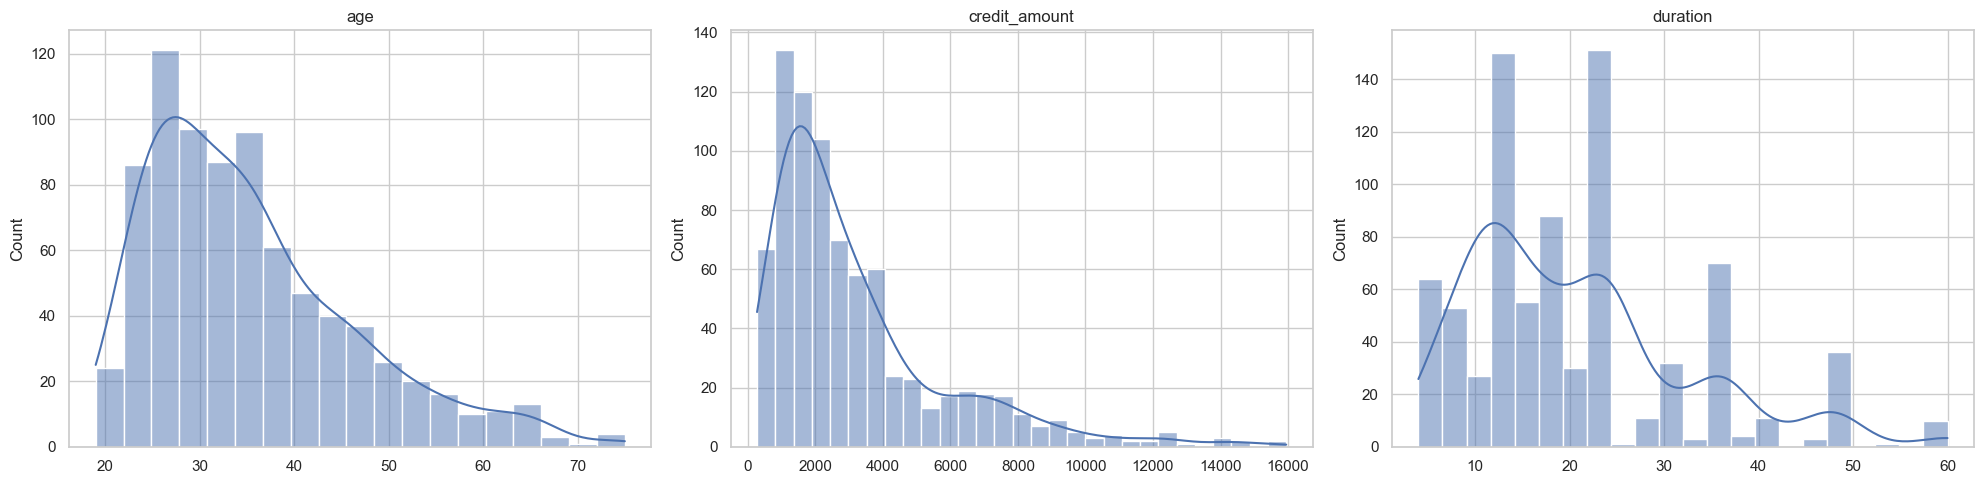

In [18]:
histplot_boxplot_features = ['age', 'credit_amount', 'duration']

sns_plots(data=train, features=histplot_boxplot_features, histplot=True, kde=True)

Insights:
1. Most of the customers are between 20 and 40 years old.
2. As expected, the distribution of credit amounts is skewed to the right. Most customers have low credit amounts, while there are some outliers with very high credit balances.
3. A significant portion of the customers stay for either 12 or 24 months while using the bank's credit service.

### Outliers
I will look at outliers in the data in order to see if they represent inconsistent information like measurement errors. Once I do this, I will decide if I will treat them or not. Moreover, I will plot boxplots below for visualization purposes.

In [19]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=histplot_boxplot_features)

There are 133 outliers in the dataset.

Number (percentage) of outliers per feature: 

age: 25 (3.12)%
credit_amount: 58 (7.25)%
duration: 50 (6.25)%


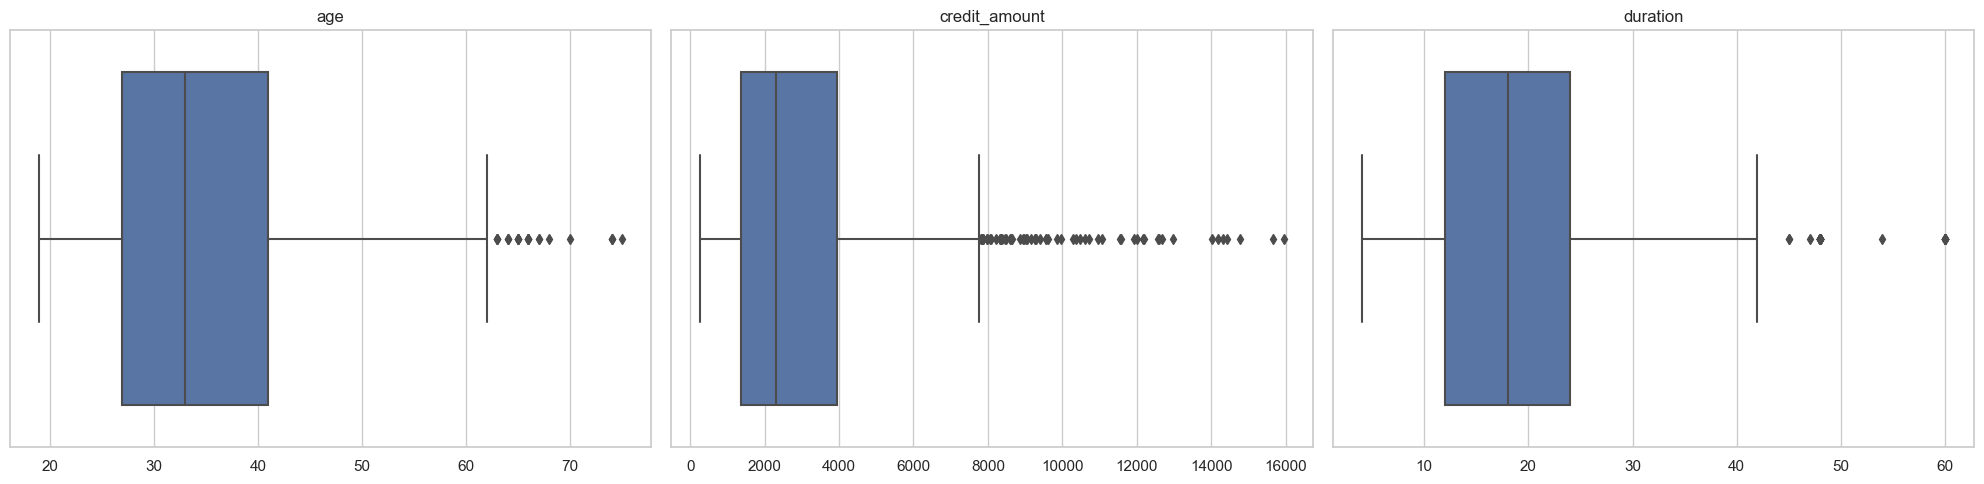

In [20]:
sns_plots(data=train, features=histplot_boxplot_features, outliers=True)

I will not drop any outlier because I have a little amount of data (just 1000 rows). Anyway, the outliers don't represent inconsistent information. Naturally, some customers will have a higher credit amount, be older and stay more time consuming the bank credit service.

### Categorical features distributions
I will look at categorical features countplots below in order to see which are the most common characteristics of the bank's customers. Moreover, I will include sex and job in these plots because sex is binary and job has just a few values, which are more easy to visualize in a countplot.

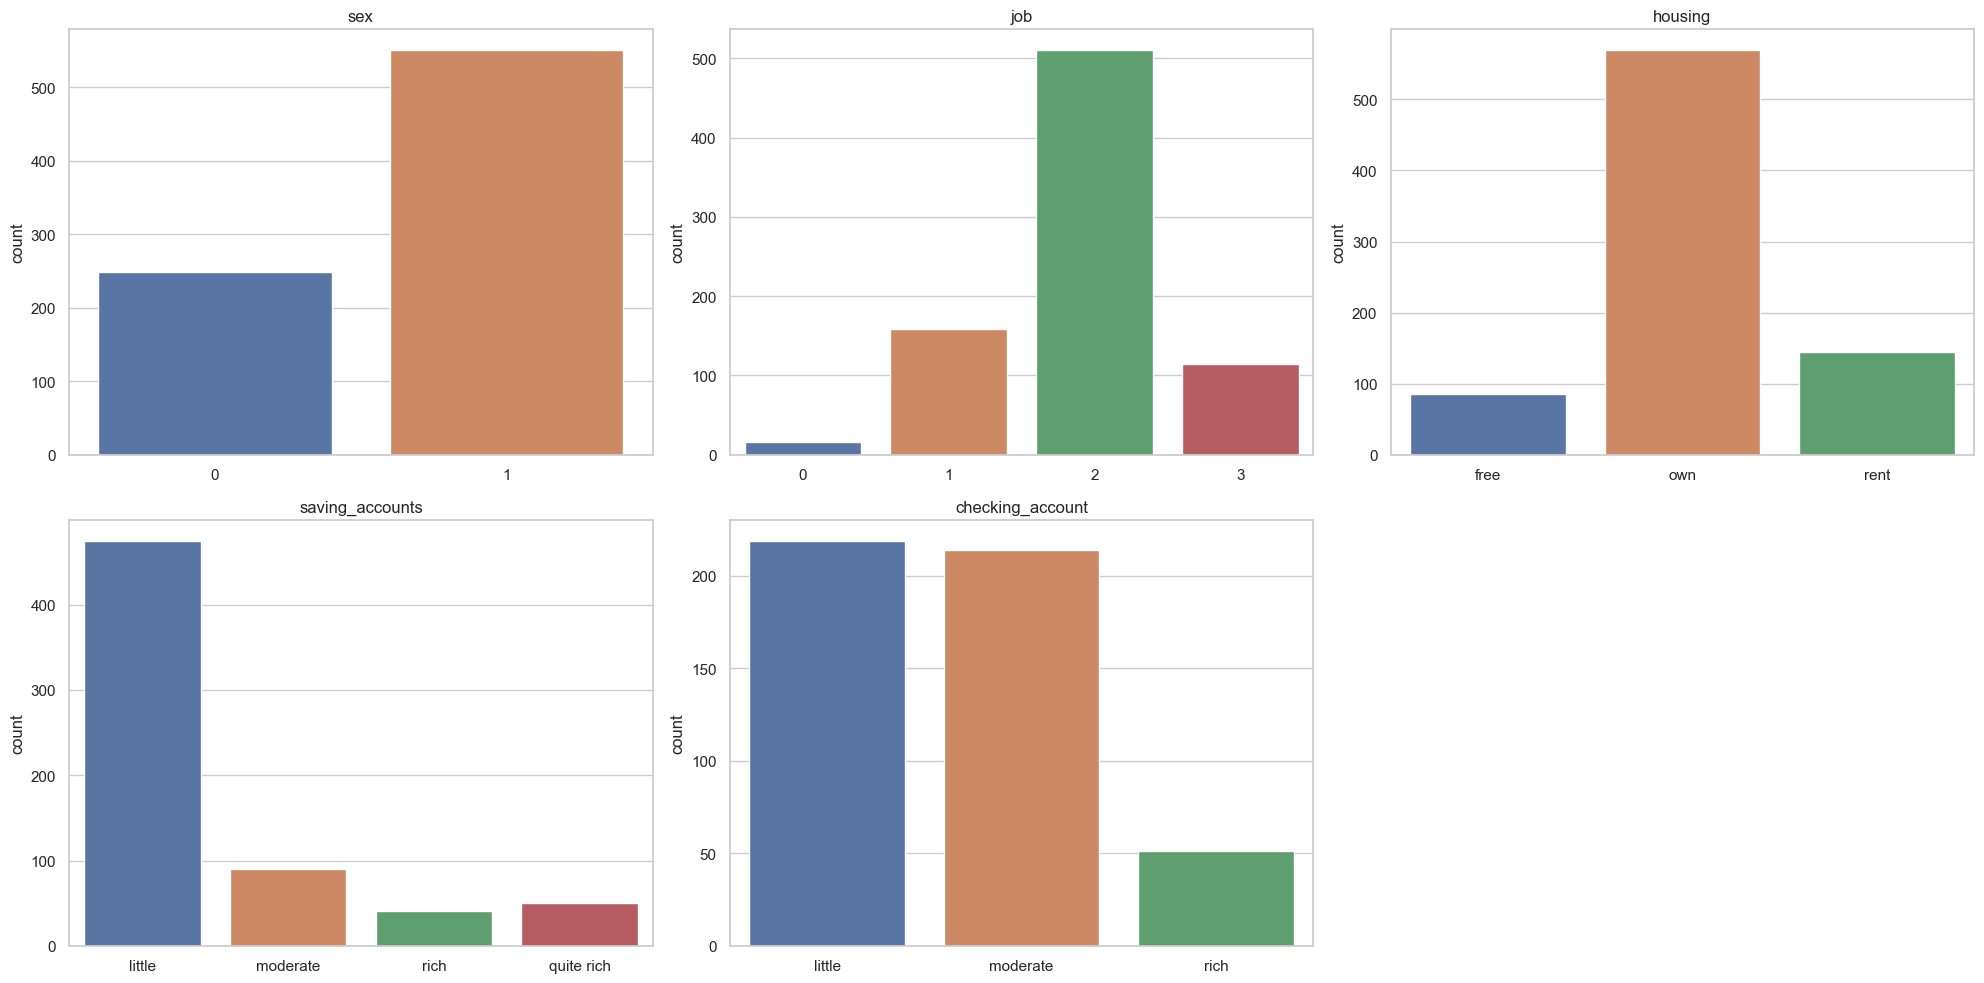

In [21]:
countplot_barplot_features = ['sex', 'job', 'housing', 'saving_accounts', 'checking_account']

sns_plots(data=train, features=countplot_barplot_features, countplot=True)

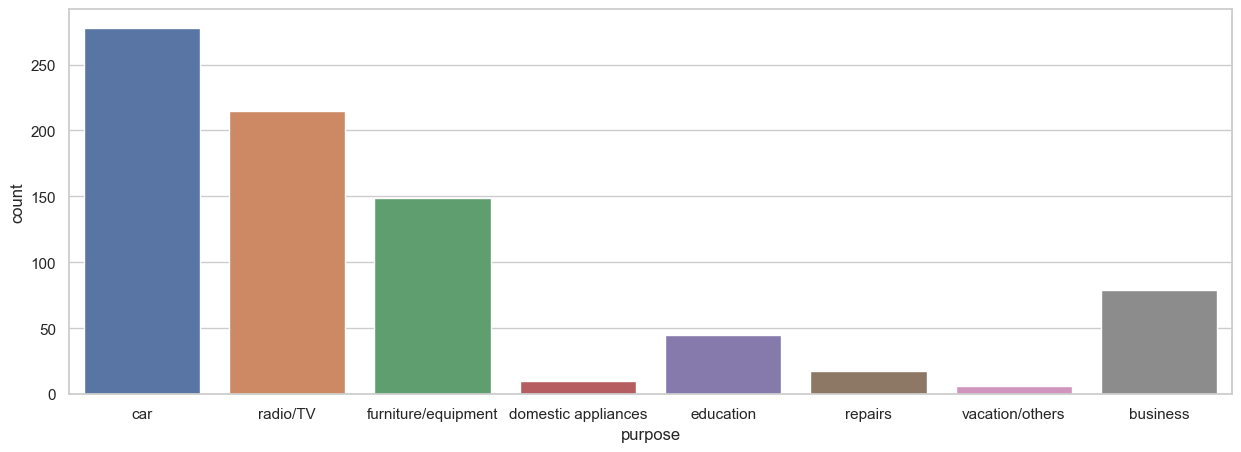

In [22]:
# Plotting purpose separately.
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=train, x='purpose')
plt.show()

Insights:
1. There are more than twice as many male customers as female ones.
2. Most of the customers jobs are skilled.
3. Most of the customers have their own house.
4. Most of the customers have little saving accounts.
5. Most of the customers have little or moderate checking account.
6. Most of the customers took out credit with the bank for car, radio/tv and furniture/equipment purposes.


### Bivariate and multivariate analysis
I will do bivariate and multivariate analysis below in order to see how the features are related to each other, particularly with the target variable (default).

### Correlation matrix
I will examine the correlation matrix in order to identify any linear relationships between the features in the data, particularly with the target variable, and assess the strength and direction of these relationships.

In [23]:
corr_matrix = train.corr(numeric_only=True)

In [24]:
corr_matrix['default'].sort_values(ascending=False)

default          1.000000
duration         0.206301
credit_amount    0.138776
job              0.019113
age             -0.057750
sex             -0.084246
Name: default, dtype: float64

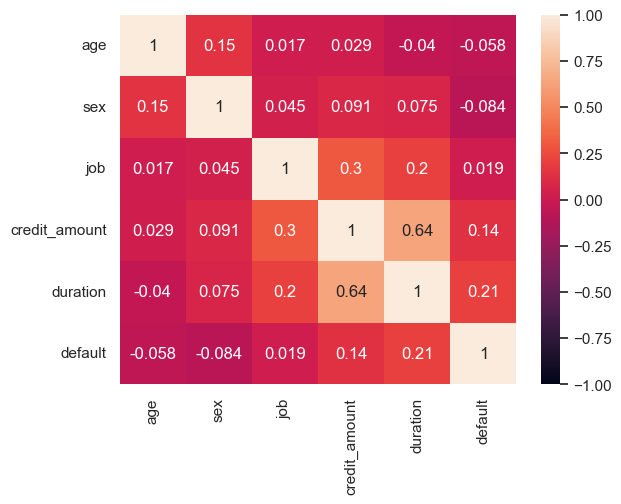

In [25]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Insights:
1. Credit amount and Duration are weakly positively correlated with the target. It makes sense because higher credit amounts tend to be associated with longer credit service durations, thus indicating a higher level of risk, while lower credit amounts tend to be associated with shorter credit service durations, presenting a lower level of risk.
2. Duration and credit amount are strongly positively correlated. Thus, when the duration of a credit service (such as a loan) is longer, the associated credit amount is generally higher, and when the duration is shorter, the associated credit amount tends to be lower. It makes total sense, higher loan amounts demand more time for being paid while lower loan amounts demand less time for being paid, for example.
3. Credit amount and Job are moderately positively correlated. Thus, customers with more skilled jobs tend to have higher credit amounts and customers with less skilled jobs tend to have lower credit amounts.

I will look at seaborn pairplot below to illustrate the insights above.

### Pairplot

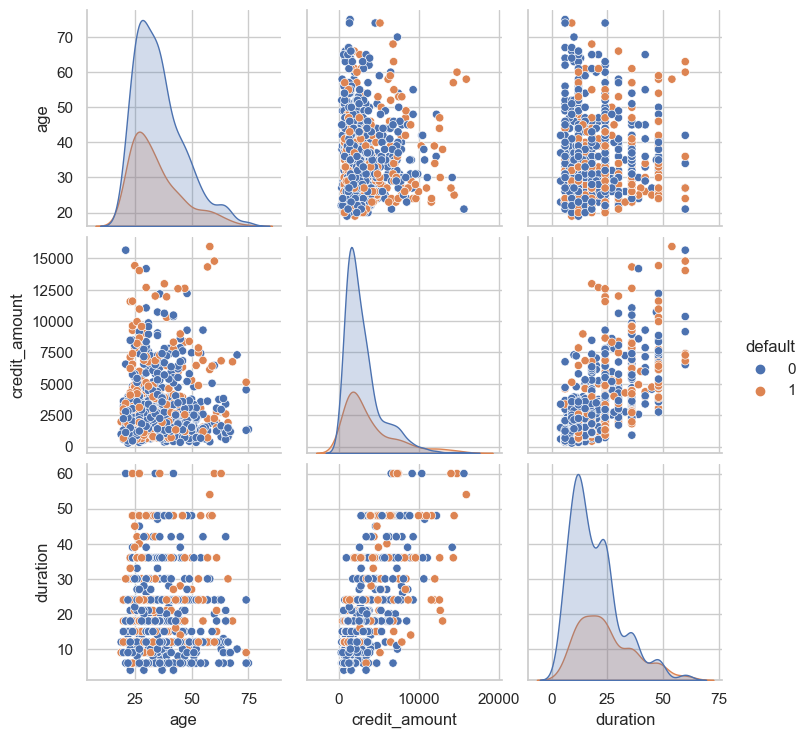

In [26]:
sns.pairplot(data=train, hue='default', vars=histplot_boxplot_features)
plt.show()

### Numerical features distributions by Default
I will look at defaulters and non-defaulters customers numerical distributions below in order to see if there is any significant difference between them.

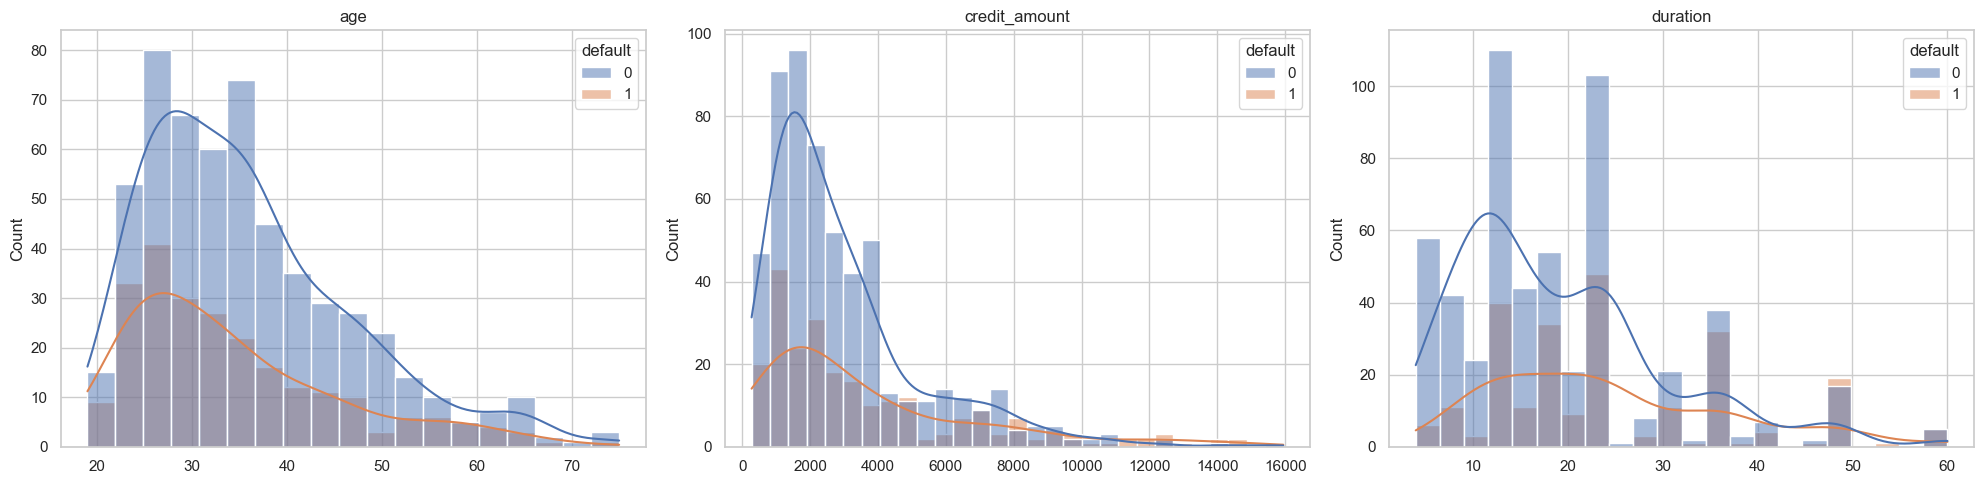

In [27]:
sns_plots(data=train, features=histplot_boxplot_features, histplot=True, kde=True, hue=target)

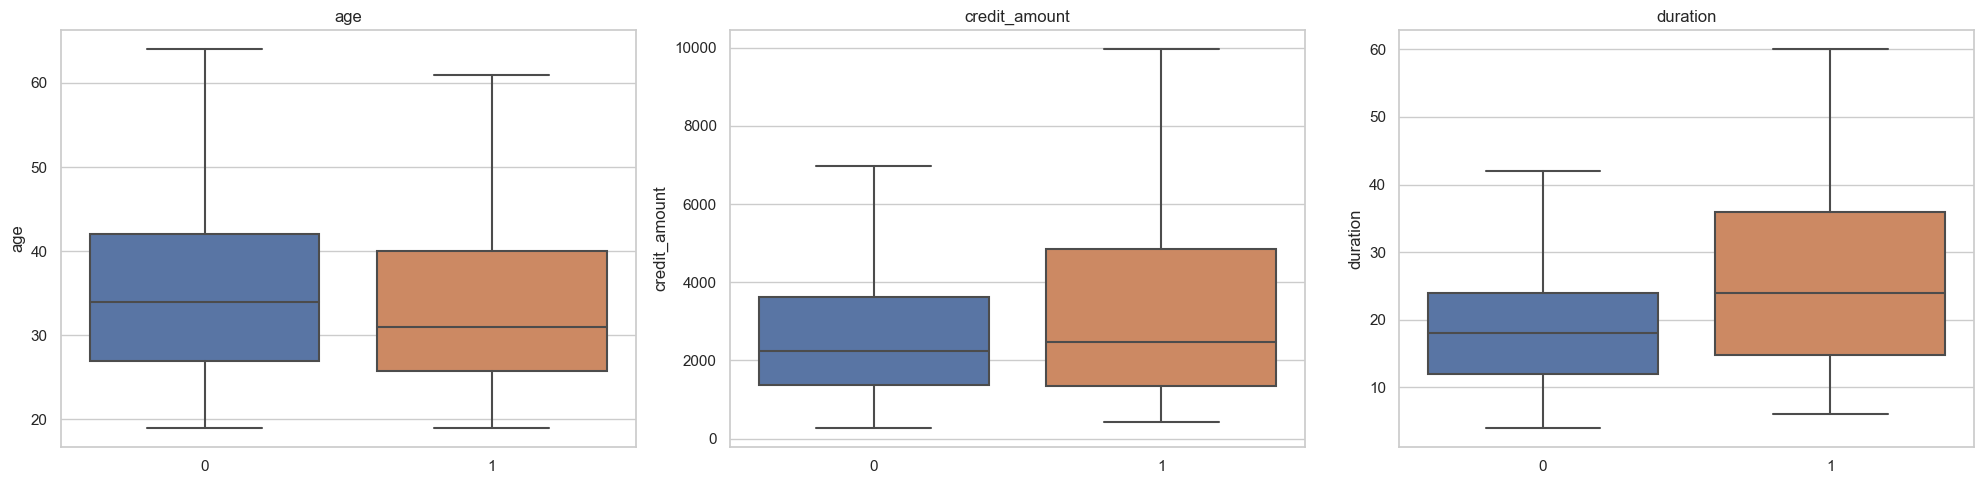

In [28]:
sns_plots(data=train, features=histplot_boxplot_features, boxplot=True, boxplot_x=target)

Insights:
1. Defaulters are slightly younger compared to non-defaulters. This makes total sense because young people generally don't have financial stability.
2. Defaulters tend to borrow higher credit amounts compared to non-defaulters. This was expected since higher credit amounts present higher levels of risk as they're harder to pay.
3. Defaulters tend to use credit services for longer durations compared to non-defaulters. This was expected because, as I saw above, when the duration of a credit service (such as a loan) is longer, the associated credit amount is generally higher and thus the levels of risk are so. Furthermore, the more time a client spends not paying the credit service he is using, the higher the risk of default.

### Categorical features distributions by Default
I will look at how defaulters and non-defaulters are distributed over different categorical features categories in order to see which are the categories with higher proportions of defaulters.

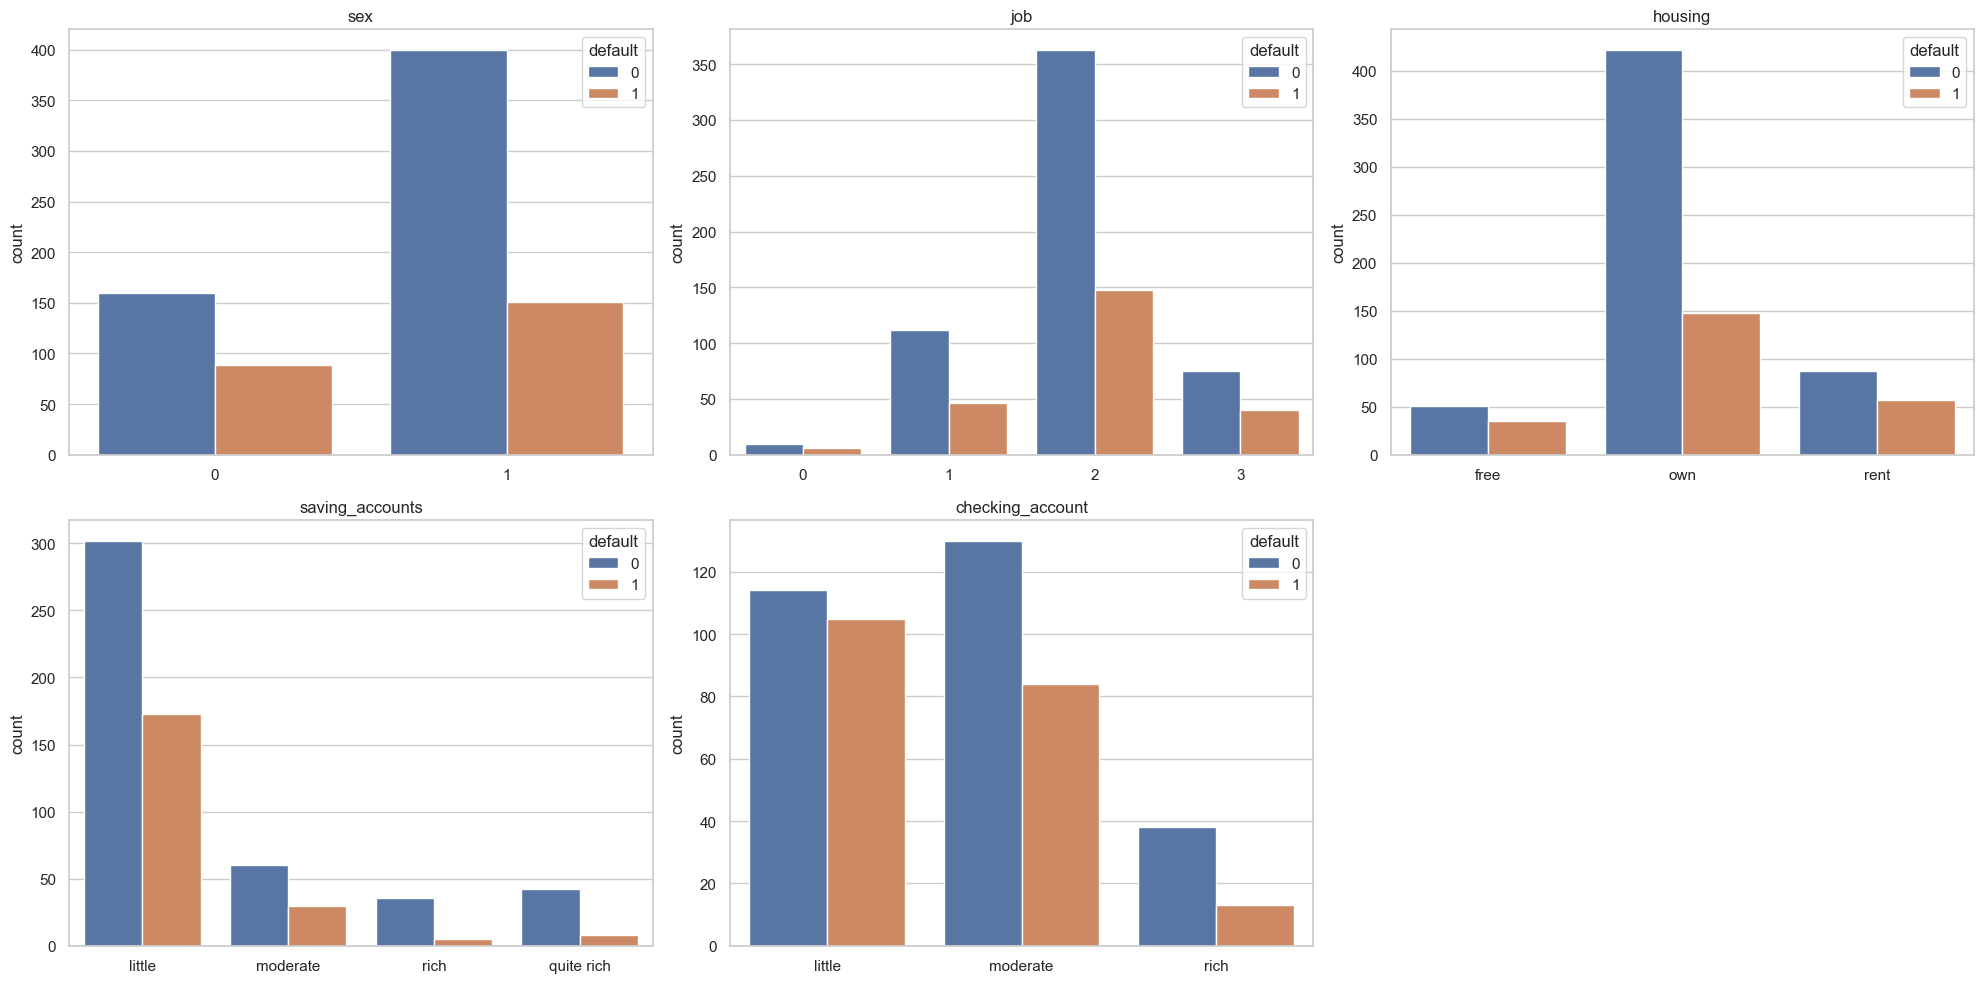

In [29]:
sns_plots(data=train, features=countplot_barplot_features, countplot=True, hue=target)

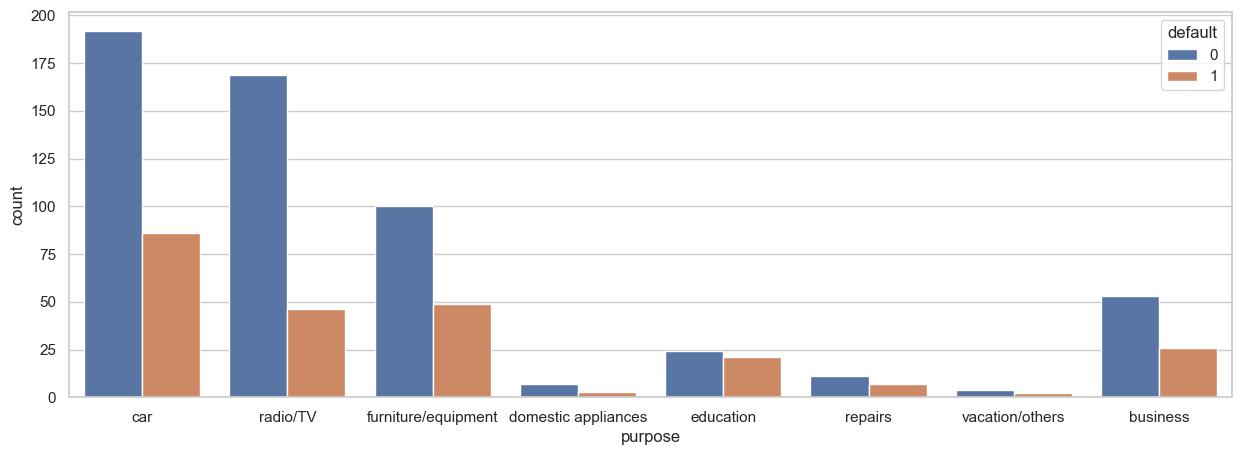

In [30]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.countplot(data=train, x='purpose', hue=target)
plt.show()

Insights:
1. The default proportion is higher in female customers. Approximately 37% of the female customers are defaulters while for male customers this proportion falls down to 27%. 
2. The default proportion is higher in free and rent housing customers. Approximately 40% of the customers in these housing domains are defaulters while for those who have their own house this proportion falls down to 26%.
3. As expected, customers with little and moderate saving accounts tend to present higher levels of risk. The opposite is true for those with rich and quite rich saving accounts. This makes total sense because clients with high saving account balances can pay their credit services much more easier than those with lower balances. Proportionally speaking, defaulters are approximately 3 times more frequent in little and moderate saving accounts when compared to rich and quite rich saving accounts.
4. The same is true for Checking account. Specially, almost 50% of the customers with little checking account are defaulters. The bank must be alert with this!
5. Interestingly, almost 50% of the customers who took out credit with the bank for education purposes are defaulters. This makes sense because those who are investing in education probably are younger and financially unstable. They must be people striving to study and build their lives.
6. Moreover, I focused on default and non-default proportions in different categorical features domains because naturally the domains with more observations (counts) will have more defaulters. This can be observed in all the variables above.

### Categorical features distributions by Credit amount
I will examine relationships among some features and credit amount below in order to see which are the characteristics of customers who take (on average) higher credit amounts and consequently present higher levels of risk. 

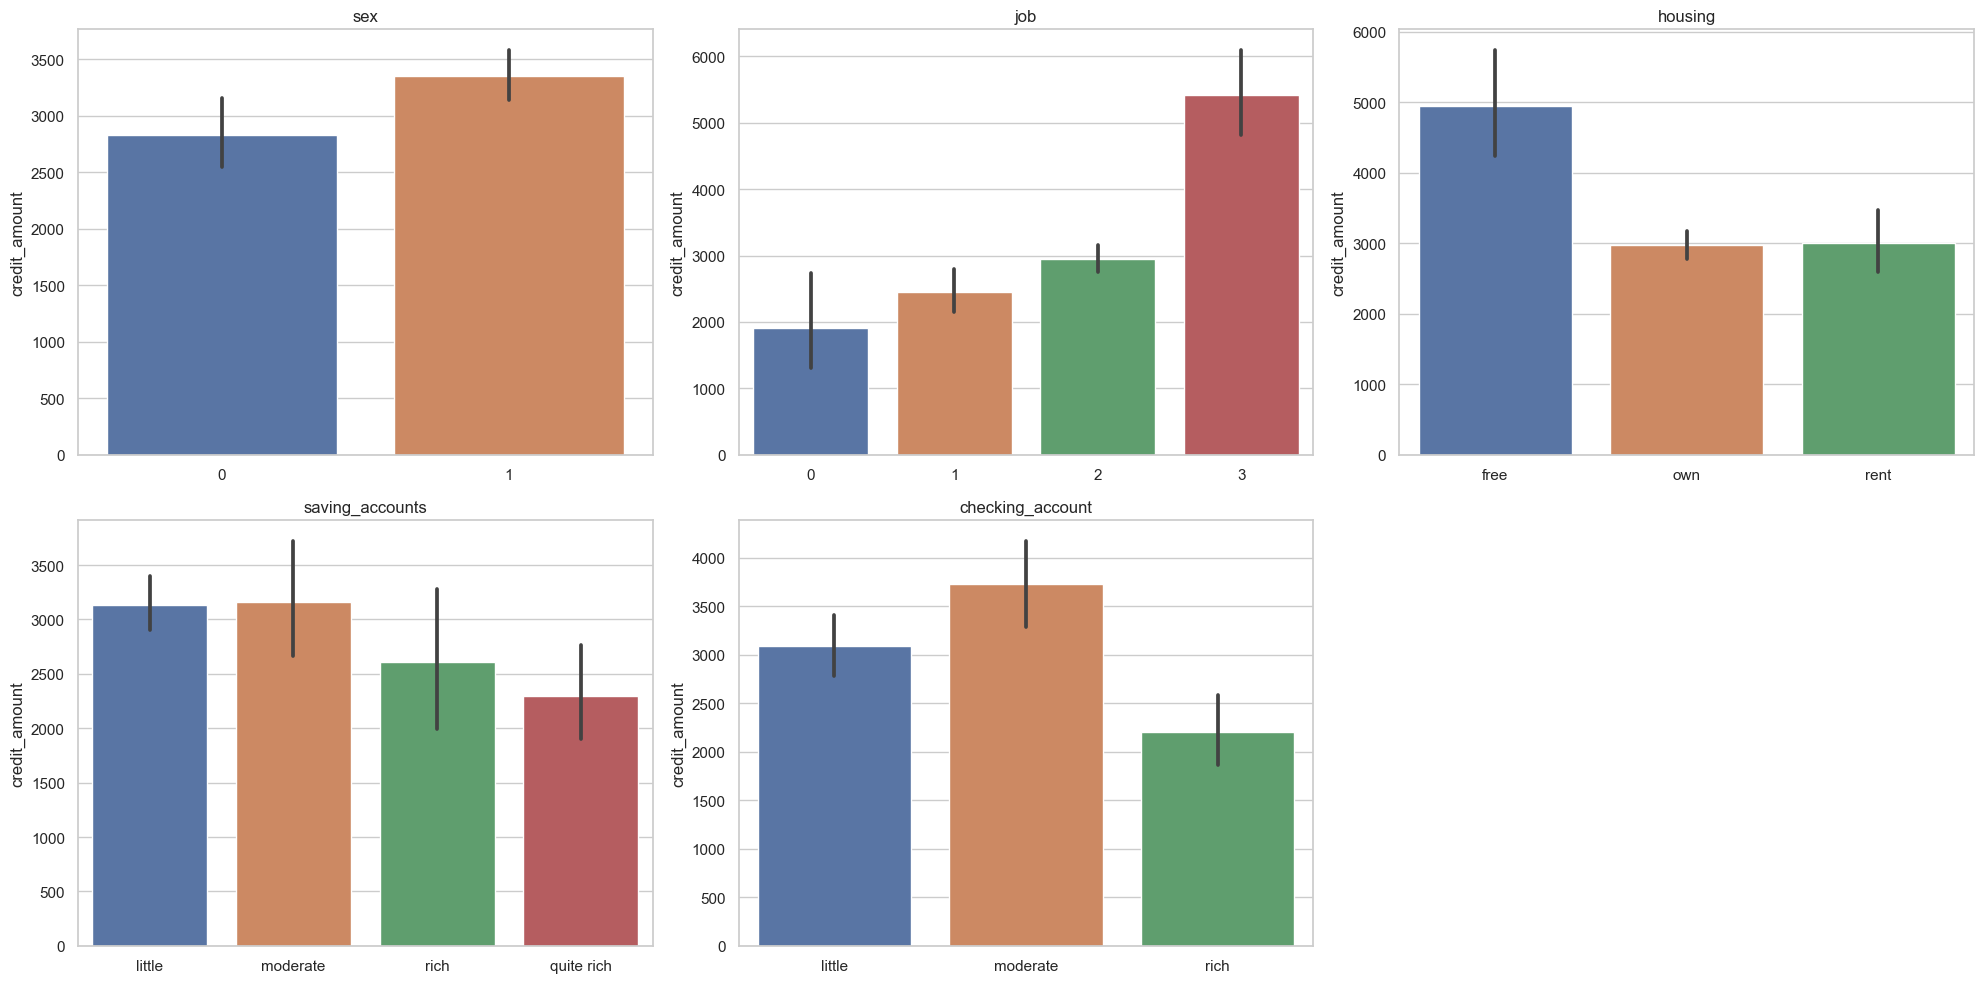

In [31]:
sns_plots(data=train, features=countplot_barplot_features, barplot=True, barplot_y='credit_amount')

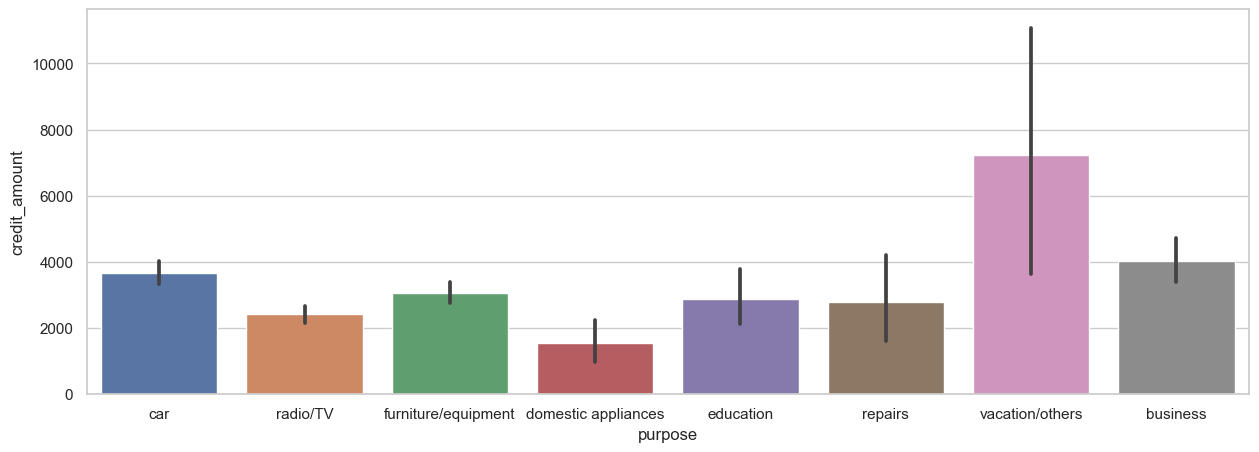

In [32]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='purpose', y='credit_amount')
plt.show()

Insights:
1. On average, customers who hold highly skilled jobs borrow higher credit amounts from the bank.
2. On average, customers within free housing category borrow higher credit amounts from the bank.
3. On average, customers who took out credit with the bank for vacation/others purpose borrow higher credit amounts from the bank.

#### Categorical features distributions by Duration
I will examine relationships among some features and duration below in order to see which are the characteristics of customers who take credit services with longer durations and consequently present higher levels of risk.

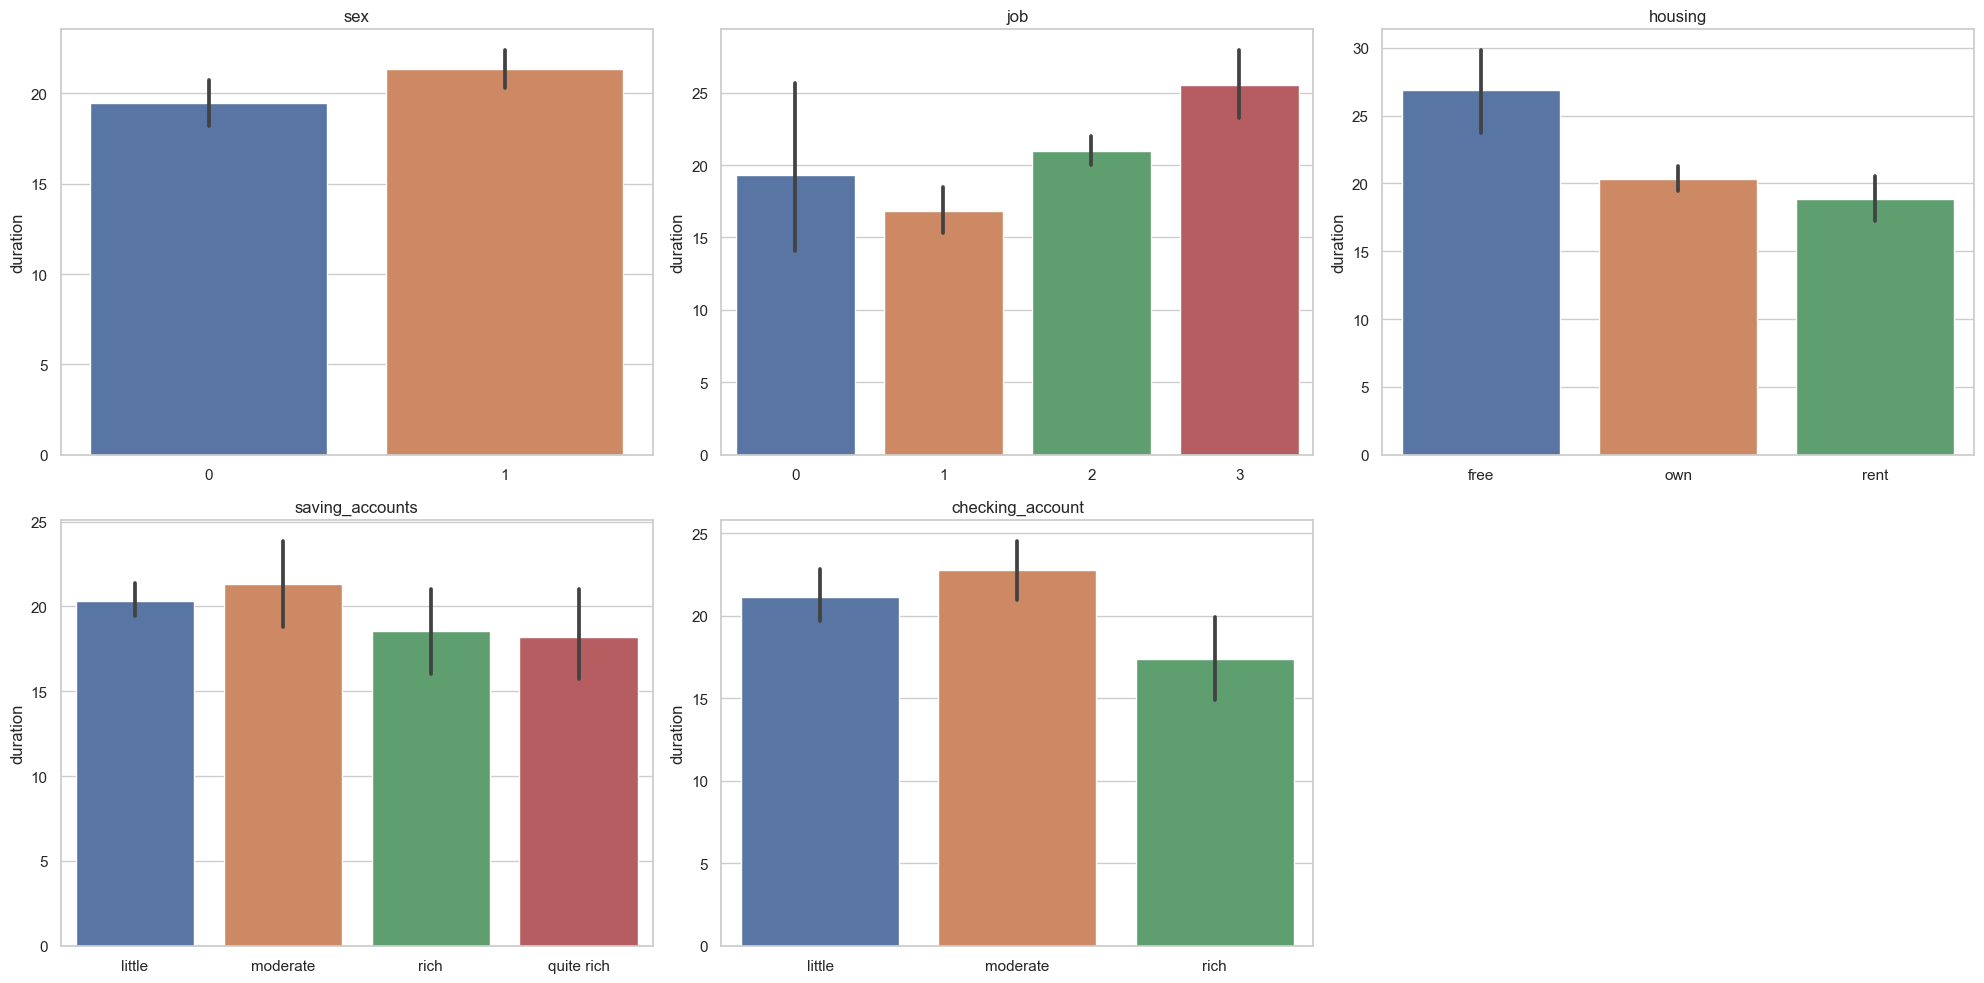

In [33]:
sns_plots(data=train, features=countplot_barplot_features, barplot=True, barplot_y='duration')

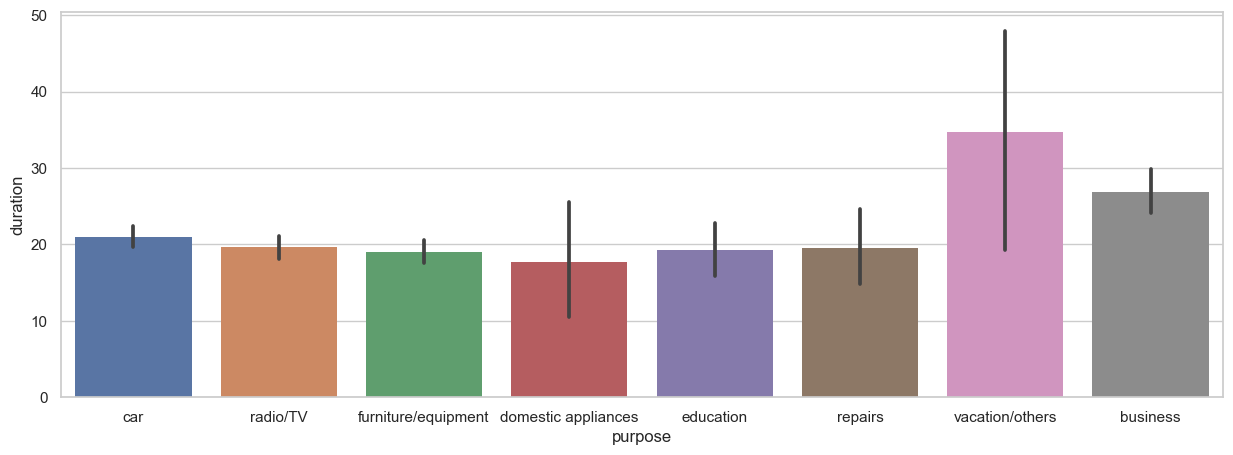

In [34]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='purpose', y='duration', linewidth=0)
plt.show()

Insights:
1. Interestingly, the same patterns found for average credit amount are present here. This was expected, since credit amount and duration are strongly positively correlated.
2. In resume, on average, customers who hold highly skilled jobs, free housing, and took out credit with the bank for vacation/others purpose use longer duration credit services.

### Credit amount and Durations by Default
I will group the customers by default in order to see how much credit was given to defaulters, what is the proportion of credit amount given for defaulters and non-defaulters and what is the average duration of credit services that were taken by each of these groups.

In [35]:
amount_duration_risk = train.groupby(['default'], as_index=False).agg({'credit_amount': 'sum', 'duration': 'mean'})
amount_duration_risk['percentage'] = amount_duration_risk['credit_amount'] / amount_duration_risk['credit_amount'].sum()
amount_duration_risk

,default,credit_amount,duration,percentage
0,0,1650236,19.175000,0.646727
1,1,901437,24.491667,0.353273


### Clustering
I will cluster the data in order to assess customers groups regard to some important features like credit amount and duration. By doing this, I will get a good idea of some hidden group tendencies in the data.

### K-Means
I will apply clustering with K-Means algorithm. It works with the steps below:
1. Initialize K centroids randomly. We define K before running the algorithm.
2. Label the instances. Each instance will be assigned to the cluster with the closest centroid. It uses the Euclidean Distance for calculating distances.
3. Update the centroids by taking the average of the instances in each cluster.
4. Repeat these steps until the centroids positions don't change anymore.

To determine the optimal number of clusters/centroids K, there are two methods:
1. Elbow Method: Uses the inertia (within cluster sum of squares). The inflexion point is chosen because the number of clusters before it (less clusters) and after it (more clusters than necessary) are suboptimal.
2. Silhouette Score: The silhouette score for an instance is given by (b-a)/max(a, b) where a is the mean intra-cluster distance and b is the mean nearest-cluster distance. It ranges from -1 to 1. The closer to 1 the better. A silhouette score close to 0 indicates that the instance is next to a cluster boundary. A silhouette score close to -1 indicates that the instance is in the wrong cluster.

I will choose K using the elbow method because I am clustering the data just for visualization and insight purposes.

### Age vs Duration clustering

In [36]:
# Getting inertias of different number of clusters K K-Means models.

clustering_df = train[['age', 'duration']]

different_k_kmeans = [KMeans(n_clusters=k, random_state=42).fit(clustering_df) for k in range(1, 6)]
inertias = [model.inertia_ for model in different_k_kmeans]

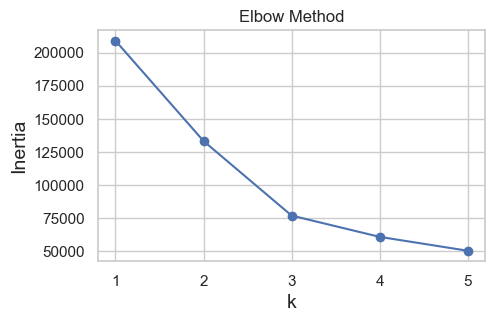

In [37]:
# Plotting curve for elbow method.

plt.figure(figsize=(5, 3))
plt.title('Elbow Method')
plt.plot(range(1, 6), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.xticks(range(1, 6))
plt.ylabel('Inertia', fontsize=14)
plt.show()

Clearly, 3 is the optimal number of clusters by the elbow method.

In [38]:
# Applying K-Means clustering with the optimal number of clusters.

k_means = KMeans(n_clusters=3)
k_means.fit(clustering_df)

KMeans(n_clusters=3)

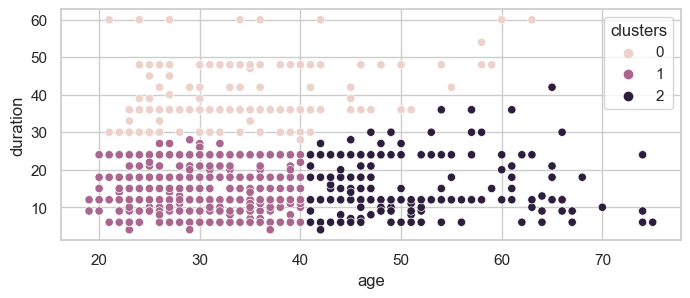

In [39]:
# Plotting the clustering result.

clustering_df['clusters'] = k_means.labels_

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering_df, x='age', y='duration', hue='clusters')
plt.show()

Insights about the groups formed:
1. Group 0: Older customers (from 40 to 70 years old) that take credit services with short durations (from 10 to 30 months).
2. Group 1: Young customers (from 20 to 40 years old) that take credit services with short durations (from 10 to 30 months). These customers might be people who don't have financial stability and take low loan values for purposes like education and so on.
3. Group 2: Customers who take credit services with longer durations. These customers might be people that represent a high level of risk and take credit for purposes like vacation/others.

### Credit amount vs Duration clustering

In [40]:
# Getting inertias of different number of clusters K K-Means models.

clustering_df = train[['credit_amount', 'duration']]

different_k_kmeans = [KMeans(n_clusters=k, random_state=42).fit(clustering_df) for k in range(1, 6)]
inertias = [model.inertia_ for model in different_k_kmeans]

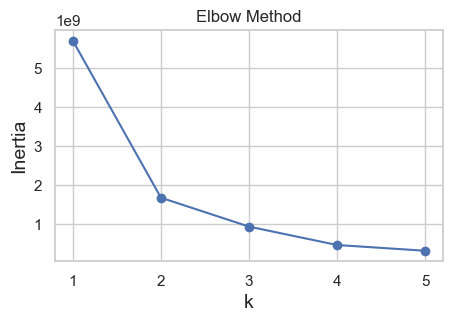

In [41]:
# Plotting curve for elbow method.

plt.figure(figsize=(5, 3))
plt.title('Elbow Method')
plt.plot(range(1, 6), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.xticks(range(1, 6))
plt.ylabel('Inertia', fontsize=14)
plt.show()

Clearly, 2 is the optimal number of clusters by the elbow method.

In [42]:
# Applying K-Means clustering with the optimal number of clusters.

k_means = KMeans(n_clusters=2)
k_means.fit(clustering_df)

KMeans(n_clusters=2)

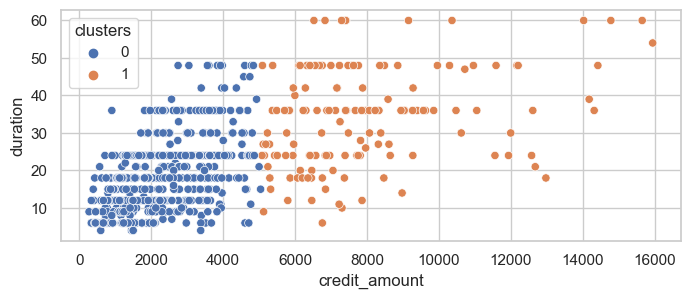

In [43]:
# Plotting the clustering result.

clustering_df['clusters'] = k_means.labels_

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering_df, x='credit_amount', y='duration', hue='clusters')
plt.show()

Insights about the groups formed:
1. Group 0: Customers who take lower credit amounts from the bank (from 0 to 5000) with various durations (from 0 to 50 months).
2. Group 1: Customers who take higher credit amounts from the bank (from 5000 to 16000) with various durations (from 0 to 60 months). The credit services with longer durations were taken by this group.

### EDA conclusions
<b>Main insights:</b><br>
<b>1.</b> Young customers tend to present higher credit risk. This makes sense since younger people usually don't have financial stability.<br>
<b>2.</b> Customers who take higher credit amounts from the bank tend to present higher risk. This makes total sense. The higher the credit amount taken, the harder it is to pay it.<br>
<b>3.</b> Customers whose credit services have a long duration present higher risk. The more time a customer spends using a credit service without paying it, the higher the risk of default.<br>
<b>4.</b> Credit amount and Duration are strongly positively correlated. Credit services with longer durations generally are associated with higher credit amounts and vice-versa. Furthermore, a weak positive correlation exists between these two features and default. This makes sense because a customer holding a credit service for a longer duration with a high credit amount taken presents higher risk.<br>
<b>5.</b> Customers with little saving and checking accounts tend to present higher credit risk. Particularly, almost 50% of the customers who have little checking accounts are defaulters.<br>
<b>6.</b> When a customer takes credit from the bank for vacation/others and education purposes, the bank must be alert. Almost 50% of the customers who took credit for education are defaulters. Moreover, vacation/others purpose presents the higher average credit amount and duration compared to all of the other purposes. Thus, these categories represent higher risk levels.<br>
<b>7.</b> In terms of profile, most of the customers are:<br>
    - Male.<br>
    - Around 36 years old.<br>
    - Hold a skilled job.<br>
    - Have their own house.<br>
    - Take low credit amounts.<br>
    - Utilize the bank's credit service for 12 or 24 months.<br>
    - Have little and little/moderate saving and checking accounts.<br>
    - Take credit for car, radio/TV and furniture/equipment purposes.<br>